# All Users

## Import Packages

In [4]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
%matplotlib inline
import matplotlib.pyplot as plt

## Load Data

In [5]:
df = pd.read_csv('../data/NMP/users/users.csv', index_col='user_id').drop(columns=['agreement_accepted']).rename(columns={'lms_user_id': 'coursera'})

## Data Cleaning and Preparation

In [6]:
# Creating Categories
df['gender'] = df['gender'].astype('category')
df['level_education'] = df['level_education'].astype('category')
df['locale'] = df['locale'].astype('category')
df['country'] = df['country'].astype('category')

# Adding Categories Necesaries
df['level_education'] = df['level_education'].cat.add_categories(['Not Mentioned'])

In [7]:
# Deleting Repeated Users
df = df.drop_duplicates(keep='last')

In [8]:
# Fillom not null values in cousera with 1
df.loc[df['coursera'].notnull(), 'coursera'] = 1

# Filling NaN Values in level_education, and coursera
df = df.fillna({'level_education': 'Not Mentioned', 'coursera': 0})

## EDA: Exploratory Data Analysis

In [9]:
# Features/Variable names
df.columns

Index(['coursera', 'email', 'gender', 'level_education', 'country', 'locale'], dtype='object')

In [10]:
# Preview the data
df.head(5)

,coursera,email,gender,level_education,country,locale
user_id,,,,,,
4,1,jmiguelangelsc@gmail.com,Male,master,MX,en
5,0,rikar_pga@hotmail.com,Male,master,MX,en
7,0,linamparamo@gmail.com,Female,master,US,en
8,1,esilvajim@gmail.com,Male,bachelor,CL,es
10,1,fecambra92@gmail.com,Male,master,MX,es


In [11]:
# General data statistics without coursera, since is boolean
df.drop(columns=['coursera']).describe()

,email,gender,level_education,country,locale
count,572,572,572,572,572
unique,571,2,6,25,2
top,ma.isabeljl@gmail.com,Male,bachelor,CL,en
freq,2,367,306,276,308


In [12]:
# Data Frame information (null, data type etc)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572 entries, 4 to 771
Data columns (total 6 columns):
coursera           572 non-null int64
email              572 non-null object
gender             572 non-null category
level_education    572 non-null category
country            572 non-null category
locale             572 non-null category
dtypes: category(4), int64(1), object(1)
memory usage: 16.9+ KB


## Data Analysis and Visualizations

### Gender

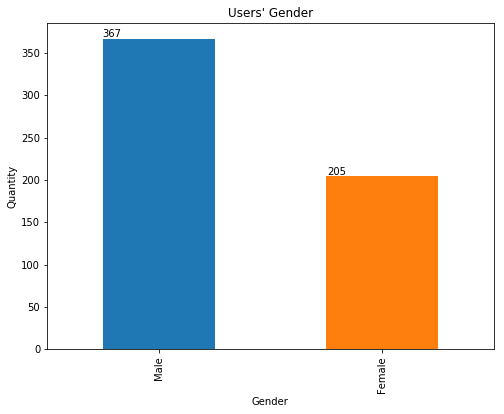

In [13]:
ax = df.gender.value_counts().plot(kind='bar', figsize=(8,6), title="Users' Gender")
ax.set_xlabel("Gender")
ax.set_ylabel("Quantity")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### Education Level

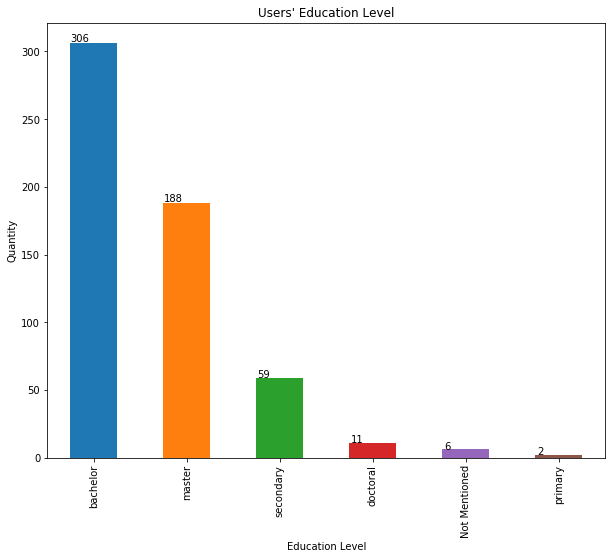

In [14]:
ax = df.level_education.value_counts().plot(kind='bar', figsize=(10,8), title="Users' Education Level")
ax.set_xlabel("Education Level")
ax.set_ylabel("Quantity")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### Country

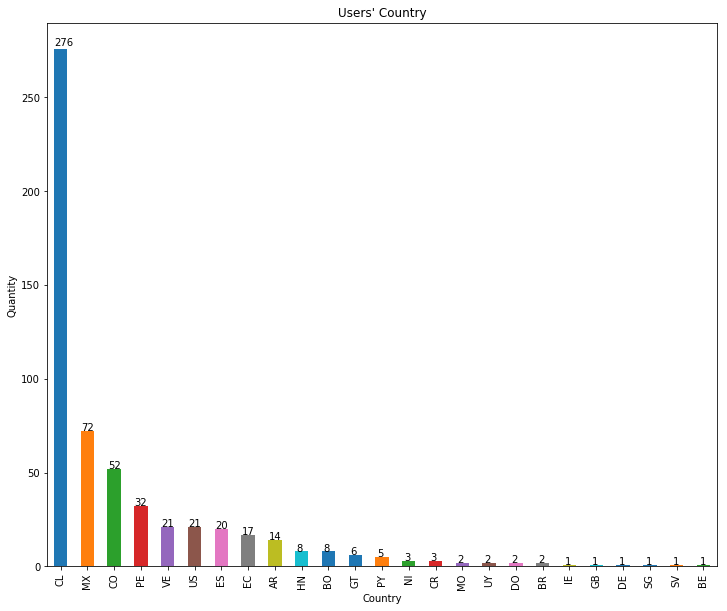

In [15]:
ax = df.country.value_counts().plot(kind='bar', figsize=(12,10), title="Users' Country")
ax.set_xlabel("Country")
ax.set_ylabel("Quantity")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### Locale

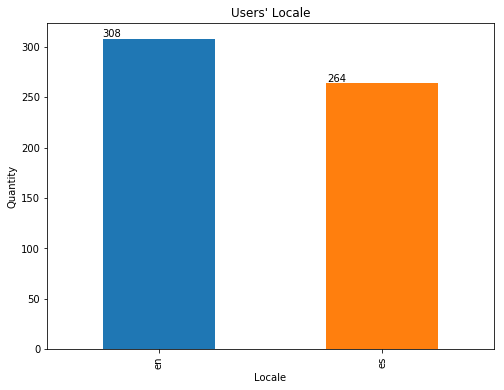

In [16]:
ax = df.locale.value_counts().plot(kind='bar', figsize=(8,6), title="Users' Locale")
ax.set_xlabel("Locale")
ax.set_ylabel("Quantity")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### Coursera

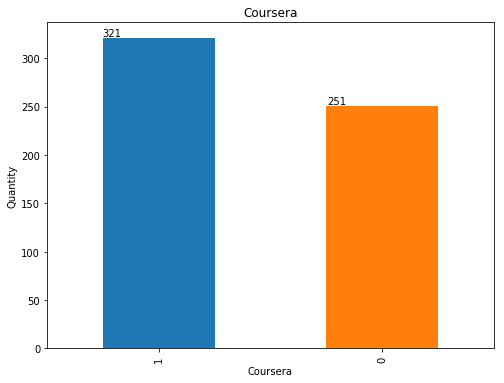

In [17]:
ax = df.coursera.value_counts().plot(kind='bar', figsize=(8,6), title="Coursera")
ax.set_xlabel("Coursera")
ax.set_ylabel("Quantity")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

## Export Data

In [19]:
df.to_csv('../data/NMP/cooked_data_all_users/users.csv')